# **AP155 Lab Assignment**
## Module 4: Ordinary Differential Equations

_Instructions_: Answer each problem as completely as you can. Discuss **all** your answers as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points**.


### Student Information

_Full Name (Last Name, First Name)_: Ryan Anthony G. Maghuyop\
_Student No._: 2020-03987\
_Section_: THU-HX-3

### Submission Information

_Date and Time Submitted (most recent upload)_: Nov. 22, 2023

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name:** Ryan Anthony G. Maghuyop

### Grading Information (c/o Lab Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Problem 1 - []/50
* Problem 2 - []/50

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

### PROBLEM 1
**The Lotka-Volterra equations**

_Refer to Exercise 8.2 in the Newman text._ The Lotka-Volterra equations are a mathematical model of predator-prey interactions between biological species. Let two variables $x$ and $y$ be proportional to the size of the populations of two species, traditionally called "rabbits" (the prey) and "foxes" (the predators). You could think of $x$ and $y$ as being the population in thousands, say, so that $x = 2$ means there are 2000 rabbits.

In the Lotka-Volterra model the rabbits reproduce at a rate proportional to their population, but are eaten by the foxes at a rate proportional to both their own population and the population of foxes:

$$\frac{{\rm d}x}{{\rm d}t} = \alpha x - \beta xy,$$

where $\alpha$ and $\beta$ are constants. At the same time the foxes reproduce at a rate proportional to the rate at which they eat rabbits-- because they need food to grow and reproduce-- but also die of old age at a rate proportional to their own population:

$$\frac{{\rm d}y}{{\rm d}t}  = \gamma xy - \delta y,$$

where $\gamma$ and $\delta$ are also constants. *(25 pts.)*

1. Solve these equations using the fourth-order Runge-Kutta method for the case $\alpha = 1, \beta = \gamma = 0.5$, and $\delta = 2$, starting from the initial condition $x = y = 2$.

2. Make a graph showing both $x$ and $y$ as a function of time on the same axes from $t =0$ to $t = 30$. *(25 pts.)*

In [ ]:
#Initializing packages
import numpy as np
import matplotlib.pyplot as plt

The Runge-Kutta method is a numerical approximation method often used to graph ordinary differential equations. For a given general differential equation with dependent variable $x$ and independent variable $t$

\begin{equation}
  \frac{dx}{dt} = f(x,t)
\end{equation}

with initial/boundary condition $x(t) = x_0$, the Runge-Kutta method approximates the value of $x$ after a short interval $h$

\begin{equation}
  x(t+h) = x(t) + \varepsilon
\end{equation}

where $\varepsilon$ depends on up to what order or accuracy we want our approximation to be. The fourth-order Runge-Kutta is the most commonly used method, where we can obtain $\varepsilon$ using the following equations:

\begin{equation}
  \begin{split}
    k_1 &= hf(x,t) \\
    k_2 &= hf \left( x + \frac{1}{2}k_1, t + \frac{1}{2}h \right) \\
    k_3 &= hf \left(x + \frac{1}{2}k_2, t + \frac{1}{2}h \right) \\
    k_4 &= hf \left( x + k_3, t + h \right) \\
    \varepsilon &= \frac{1}{6}\left(k_1 + 2k_2 + 2k_3 + k_4 \right)
  \end{split}
\end{equation}

This method can be easily extended for *simultaneous differential equations* with $n$ dependent variables $x_1(t), x_2(t), ..., x_n(t)$. We can parametrize the $n$ differential equations using the vector $\vec{r} = (x_1(t), x_2(t), ..., x_n(t))$ and the vector function $\vec{f}(\vec{r},t) = (f_1(\vec{r},t),f_2(\vec{r},t), ..., f_n(\vec{r},t))$. Thus, we can decompose our $n$ differential equations into simply

\begin{equation}
  \frac{d\vec{r}}{dt} = \vec{f}(\vec{r},t).
\end{equation}

From here, we can use the same formulation above to approximate our $n$ simultaneous differential equations.

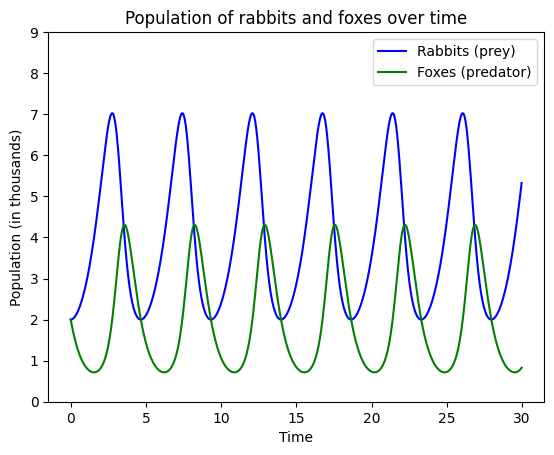

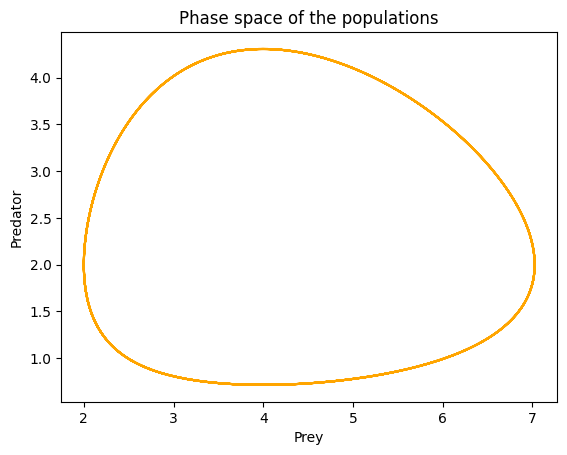

In [ ]:
#Parameters, for generalizing later
p = [1,0.5,0.5,2]

#User defined function that parametrizes our two DEs into one function dependent on the array r
def f(r,t,p):
  x = r[0]
  y = r[1]
  fx = p[0]*x - p[1]*x*y
  fy = p[2]*x*y - p[3]*y
  return np.array([fx,fy],float)

#Start and end points, # of slices, and step size
a = 0.0
b = 30.0
N = 1000
h = (b-a)/N

#Array of points for plotting
tpoints = np.arange(a,b,h)
xpoints = []
ypoints = []
r = np.array([2.0,2.0], float) #Initial values

#Appending values for our plots and applying the 4th order Runge-Kutta method iteratively
for t in tpoints:
  xpoints.append(r[0])
  ypoints.append(r[1])
  k1 = h*f(r,t,p)
  k2 = h*f(r + 0.5*k1, t + 0.5*h,p)
  k3 = h*f(r + 0.5*k2, t + 0.5*h,p)
  k4 = h*f(r + k3, t + h,p)
  r += (k1 + 2*k2 + 2*k3 + k4)/6

fig, ax = plt.subplots()
ax.set_xlabel("Time")
ax.set_ylabel("Population (in thousands)")
ax.set_title("Population of rabbits and foxes over time")
plt.ylim(0,9) #To make space for legend
ax.plot(tpoints,xpoints, label = 'Rabbits (prey)', color = 'blue')
ax.plot(tpoints,ypoints, label = 'Foxes (predator)', color = 'green')
ax.legend()
plt.show()

fig1, ax1 = plt.subplots()
ax1.set_xlabel("Prey")
ax1.set_ylabel("Predator")
ax1.set_title("Phase space of the populations")
ax1.plot(xpoints,ypoints, color = 'orange')
plt.show()

As seen from our plot above, the rabbits are initially increasing while the foxes initially decreasing. The fox population decreases up until a critical point where there are too few predators left along with an abundance of prey. Thus, the fox population starts increasing again along with the rabbits. Eventually, due to the constraints of the environment, the rabbit population reaches its maximum. Since the foxes are still increasing in number, this causes a decrease in the population of the rabbits. Similarly, the fox population also eventually reaches its maximum due to the constraints of the environment. Since the rabbit population has been decreasing at the same time, the fox population also decreases due to the decrease in the amount of prey available. After some time, the rabbit population reaches a critical point, where there are too few predators left and the environment can sufficiently support the population again, allowing them to thrive again and increase in population, starting the loop all over again.

We can plot the phase space diagram of the rabbit and fox populations to check the cyclical behaviour of the populations. As seen above, there is exactly one closed loop in our phase space, and thus we can conclude that the population behaviour of preys and predators are cyclical as time goes on.

The Lotka-Volterra equations are given by

\begin{equation}
  \frac{dx}{dt} = \alpha x - \beta xy \qquad \text{ and } \qquad \frac{dy}{dt}  = \gamma xy - \delta y.
\end{equation}

The physical interpretation of the parameters in the equations are as follows [1]:
- $\alpha$ - maximum prey per capita growth rate
- $\beta$ - effect of the presence of predators on the prey growth rate
- $\gamma$ - effect of the presence of prey on the predator's growth rate
- $\delta$ - predator's per capita death rate

We can change our parameters to check their effects on the equations.

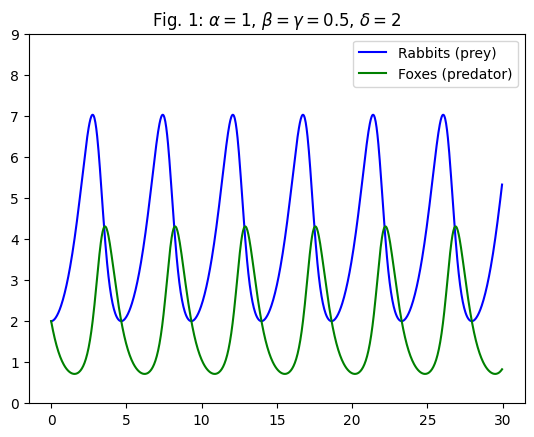

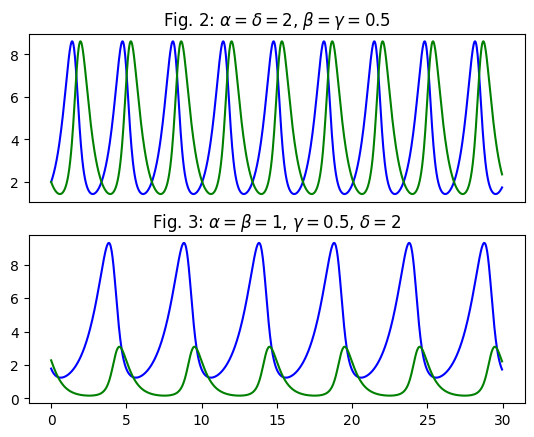

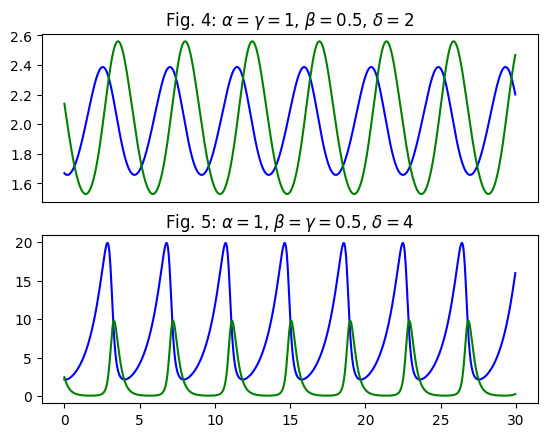

In [ ]:
#Parameters
p1 = [2,0.5,0.5,2]
p2 = [1,1,0.5,2]
p3 = [1,0.5,1,2]
p4 = [1,0.5,0.5,4]
pn = [p1,p2,p3,p4]

iv = np.array([2.0,2.0], float) #Initial values
r1 = iv
r2 = iv
r3 = iv
r4 = iv

#Collecting all our parameters, initial values, and plot points in lists lets us iterate our code for efficient plot making
xnpoints = [[],[],[],[]]
ynpoints = [[],[],[],[]]
rn = [r1, r2, r3, r4]

for j in range(0,4): #For each j, run the entire program for making one plot
  for t in tpoints:
    xnpoints[j].append(rn[j][0])
    ynpoints[j].append(rn[j][1])
    k1 = h*f(rn[j],t,pn[j])
    k2 = h*f(rn[j] + 0.5*k1, t + 0.5*h,pn[j])
    k3 = h*f(rn[j] + 0.5*k2, t + 0.5*h,pn[j])
    k4 = h*f(rn[j] + k3, t + h,pn[j])
    rn[j] += (k1 + 2*k2 + 2*k3 + k4)/6


fig, ax = plt.subplots()
ax.plot(tpoints,xpoints, color = 'blue', label = 'Rabbits (prey)')
ax.plot(tpoints,ypoints, color = 'green', label = 'Foxes (predator)')
ax.set_title(r'Fig. 1: $\alpha = 1$, $\beta = \gamma = 0.5$, $\delta = 2$')
ax.set_ylim(0,9)
ax.legend()
plt.show()

fig1, ax1 = plt.subplots(2)
ax1[0].plot(tpoints,xnpoints[0], color = 'blue')
ax1[0].plot(tpoints,ynpoints[0], color = 'green')
ax1[0].set_title(r'Fig. 2: $\alpha = \delta = 2$, $\beta = \gamma = 0.5$')
ax1[0].tick_params(labelbottom = False, bottom = False) #To make space for the title
ax1[1].plot(tpoints,xnpoints[1], color = 'blue')
ax1[1].plot(tpoints,ynpoints[1], color = 'green')
ax1[1].set_title(r'Fig. 3: $\alpha = \beta =1$, $\gamma = 0.5$, $\delta = 2$')
plt.show()

fig2, ax2 = plt.subplots(2)
ax2[0].plot(tpoints,xnpoints[2], color = 'blue')
ax2[0].plot(tpoints,ynpoints[2], color = 'green')
ax2[0].set_title(r'Fig. 4: $\alpha = \gamma = 1$, $\beta = 0.5$, $\delta = 2$')
ax2[0].tick_params(labelbottom = False, bottom = False) #To make space for the title
ax2[1].plot(tpoints,xnpoints[3], color = 'blue')
ax2[1].plot(tpoints,ynpoints[3], color = 'green')
ax2[1].set_title(r'Fig. 5: $\alpha = 1$, $\beta = \gamma = 0.5$, $\delta = 4$')
plt.show()

We can see the effects of changing these parameters on the plots above. Figure 1 is the same plot from the question above, which will serve as our reference plot. As seen in Figure 2, increasing $\alpha$ causes a higher peak in the maximum population of the prey, as expected. An interesting side effect of this is that the maximum predator population increases to be the same as that of the prey. This is because the prey growth rate and predator death rate per capita are now the same, equalizing the peak of the two populations. The cycle also seems to happen faster, with around 9 cycles finished within the same time that around 6 cycles finished from our previous plot.

In Figure 3, we see that increasing $\beta$ also causes the prey population to have a higher peak. This shows a scenario where an increase in the number of predators has a lesser effect on the decrease population of the prey, compared to our reference. Conversely, we can see in Figure 4 that increasing $\gamma$ causes the prey population to have a lower peak. This is then the scenario where an increase in the number of predators has an adverse effect on the population of the prey, preventing them from reaching high population numbers.

Lastly, we see on Figure 4 that increasing $\delta$ causes both of the populations to have a much higher peak. Since there are much more predator deaths per capita, the prey are allowed to naturally increase in population, up to a higher peak, which then causes the predators to have a more favorable environment, also allowing a higher peak in population. This increase in the population of the predators balances out with the higher death rate, ending with a higher population for both the preys and the predators. It should be noted that due to the symmetry of the equations, increasing $\alpha$ by a factor $k$ is the same as decreasing $\delta$ by the same factor, and vice versa. The same is true for $\beta$ and $\gamma$.

A stable equilibrium population can be achieved if the derivatives are set to zero, which corresponds to having there be no change in the population. Then, the Lotka-Volterra equations transform into

\begin{equation}
  (\alpha - \beta y)x = 0 \qquad \text{ and } \qquad (\gamma x - \delta)y = 0
\end{equation}

This system of equations has two solutions. The trivial solution is $x = y = 0$ which corresponds to an extinct population, since the population would indeed not change if both the preys and the predators are extinct. The other solution is

\begin{equation}
  x = \frac{\delta}{\gamma} \qquad \text{ and } \qquad y = \frac{\alpha}{\beta}.
\end{equation}

We can tweak our parameters to match our initial conditions for $x$ and $y$ to achieve a stable equilibrium, which can be seen in the plot below.

References: \
[1] Cooke, D., et al. (1981). *The Mathematical Theory of the Dynamics of Biological Populations*. Vol 2. Academic Press.


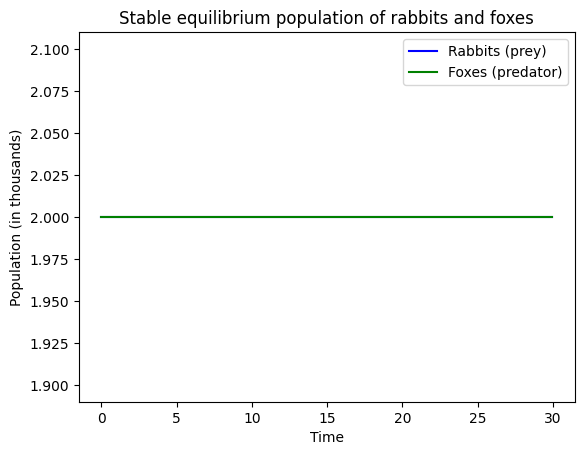

In [ ]:
p5 = [1,0.5,0.5,1]

x5points = []
y5points = []
r5 = np.array([2.0,2.0], float)

for t in tpoints:
  x5points.append(r5[0])
  y5points.append(r5[1])
  k1 = h*f(r5,t,p5)
  k2 = h*f(r5 + 0.5*k1, t + 0.5*h,p5)
  k3 = h*f(r5 + 0.5*k2, t + 0.5*h,p5)
  k4 = h*f(r5 + k3, t + h,p5)
  r += (k1 + 2*k2 + 2*k3 + k4)/6

fig, ax = plt.subplots()
ax.set_xlabel("Time")
ax.set_ylabel("Population (in thousands)")
ax.set_title("Stable equilibrium population of rabbits and foxes")
ax.plot(tpoints,x5points, label = 'Rabbits (prey)', color = 'blue')
ax.plot(tpoints,y5points, label = 'Foxes (predator)', color = 'green')
ax.legend()
plt.show()

### PROBLEM 2

**Nonlinear pendulum**

_Refer to Exercise 8.4 in the Newman text._ Building on the results from Example 8.6, calculate the motion of a nonlinear pendulum as follows.

1. Solve the two first-order equations, Eqs. (8.45) and (8.46), using the fourth-order Runge-Kutta method for a pendulum with a 10 cm arm. Use your program to calculate the angle $\theta$ of displacement for several periods of the pendulum when it is released from a standstill at $\theta = 179^\circ$ from the vertical. *(25 pts.)*

2. Make a graph of $\theta$ as a function of time. *(25 pts.)*


The equation of motion for a nonlinear pendulum is

\begin{equation}
  \frac{d^2 \theta}{dt^2} = -\frac{g}{l}\sin{\theta}
\end{equation}

We can introduce an intermediate variable $\omega$, transforming our equation of motion from one second order DE into two first order DEs.

\begin{equation}
  \omega = \dfrac{d \theta}{dt} \qquad \text{ and } \qquad \frac{d\omega}{dt} = -\frac{g}{l}\sin{\theta}
\end{equation}

From this, we can use the same method above to graph $\theta$ as a function of time. Since we are given an initial value of $\theta_0 = 179^{\circ}$, we can also get $\omega_0 = 0$, which makes sense since $\omega$ is the angular velocity and the pendulum is said to be released from a standstill.

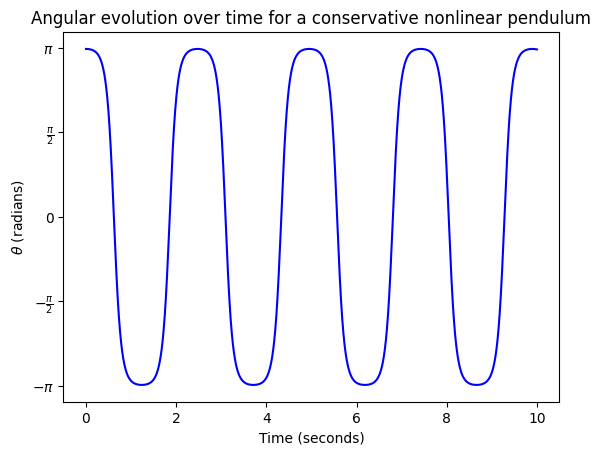

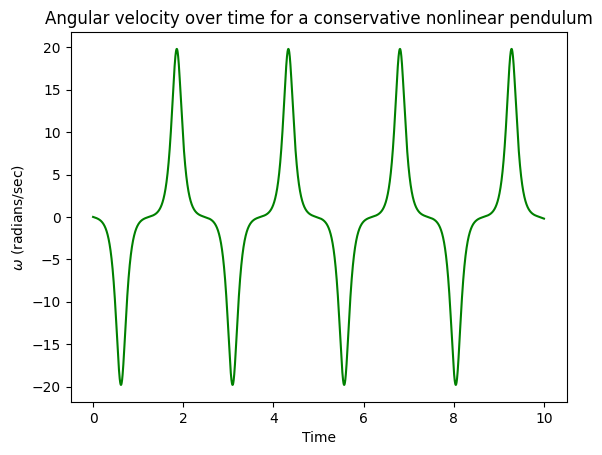

In [ ]:
#Physical parameters
g = 9.81
l = 0.1

#User defined function that parametrizes our two DEs into one function dependent on the array r
def f(r,t):
  theta = r[0]
  omega = r[1]
  ftheta = omega
  fomega = -(g/l)*np.sin(theta)
  return np.array([ftheta,fomega] ,float)

#Start and end points, # of slices, heights for RK
a = 0.0
b = 10.0
N = 10000
h = (b-a)/N

#Array of points for plotting
tpoints = np.arange(a,b,h)
thpoints = []
ompoints = []
r = np.array([179*np.pi/180,0],float) #Initial values *np.sin() accepts radians by default, so we convert into radians

#Appending values for our plots, then applying the 4th order Runge-Kutta method
for t in tpoints:
  thpoints.append(r[0])
  ompoints.append(r[1])
  k1 = h*f(r,t)
  k2 = h*f(r + 0.5*k1, t + 0.5*h)
  k3 = h*f(r + 0.5*k2, t + 0.5*h)
  k4 = h*f(r + k3, t + h)
  r += (k1 + 2*k2 + 2*k3 + k4)/6

fig, ax = plt.subplots()
ax.set_xlabel('Time (seconds)')
ax.set_ylabel(r'$\theta$ (radians)')
ax.set_yticks([-np.pi, -np.pi/2,0, np.pi/2, np.pi])
ax.set_yticklabels([r'$-\pi$',r'$-\frac{\pi}{2}$','0',r'$\frac{\pi}{2}$',r'$\pi$'])
ax.set_title('Angular evolution over time for a conservative nonlinear pendulum')
ax.plot(tpoints,thpoints, color = 'blue')
plt.show()

fig1, ax1 = plt.subplots()
ax1.set_xlabel('Time')
ax1.set_ylabel(r'$\omega$ (radians/sec)')
ax1.set_title('Angular velocity over time for a conservative nonlinear pendulum')
ax1.plot(tpoints,ompoints, color = 'green')
plt.show()

From our plots, we can see the cyclic behaviour of a conservative pendulum. The angle $\theta$ oscillates continuously from $\theta_0 \approx \pi$ radians until $\theta \approx -\pi$ radians since the energy is conserved in the system, and thus the pendulum conserves its starting amplitude and starts over again. Visually, we can see that the extremas of $\omega$ coincides to when $\theta = 0$. We can numerically verify this through this code snippet:

In [ ]:
thpoints1 = thpoints[0:1000] #Approximate range of first half-wavelength of values
ompoints1 = ompoints[0:1000] #It is sufficient to only use this range since the values are cyclical for all t (to be discussed below)

zero = min(np.absolute(thpoints1)) #theta = 0
if zero in thpoints1: #Index of theta = 0; if-else statement since we don't know if 'zero' is +Ɛ or -Ɛ
  index1 = thpoints1.index(zero)
else:
  index1 = thpoints1.index(-zero)

extrema = min(ompoints1) #Extrema of omega
index2 = ompoints1.index(extrema) #Index of extrema of omega

index1 == index2

True

This follows from our expected result, since for a conservative system

\begin{equation}
T + U = \text{constant}
\end{equation}

where $T$ and $U$ are the kinetic and potential energies, respectively. When $\theta = 0$, the pendulum is at its lowest height, and thus $U$ is minimized and $T$ is maximized. Since $T \propto \omega$, we expect that $\omega$ is at its maximum magnitude whenever $\theta = 0$. Visually, it seems like the system is cyclical as $t$ increases indefinitely. We can verify this by plotting the phase space diagram of the system.

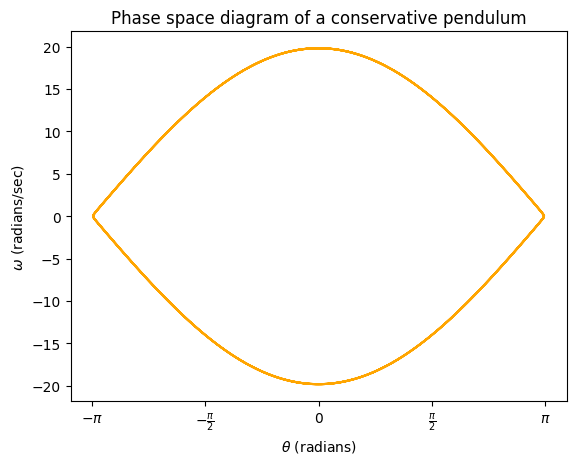

In [ ]:
fig2, ax2 = plt.subplots()
ax2.set_xlabel(r'$\theta$ (radians)')
ax2.set_ylabel(r'$\omega$ (radians/sec)')
ax2.set_title('Phase space diagram of a conservative pendulum')
ax2.set_xticks([-np.pi, -np.pi/2,0, np.pi/2, np.pi])
ax2.set_xticklabels([r'$-\pi$',r'$-\frac{\pi}{2}$','0',r'$\frac{\pi}{2}$',r'$\pi$'])
ax2.plot(thpoints,ompoints, color ='orange')
plt.show()

 As seen above, there is exactly one closed loop in our phase space, and thus we know that the values of $\theta$ and $\omega$ would just repeat indefinitely as $t \to \infty$. A more realistic model for a pendulum would have some damping in the equation to account for energy loss due to friction, heat, etc. Thus, we can add a damping force $D_F$ into our system to account for this energy loss.

\begin{equation}
  \frac{d^2 \theta}{dt^2} + \frac{g}{l}\sin{\theta} - D_F = 0
\end{equation}

If the magnitude of the angular velocity is small, the damping force is known to be proportional to $\omega$ and acts against the direction of motion. Therefore, we can model $D_F$ to be

\begin{equation}
  D_F = - k \frac{d \theta}{dt}
\end{equation}

where $k$ is a proportionality constant. The equation of motion for our damped oscillator would then be


\begin{equation}
  \frac{d^2 \theta}{dt^2} + k \frac{d \theta}{dt} + \frac{g}{l} \sin{\theta} = 0
\end{equation}

Doing the same procedure above, we use the intermediate variable $\omega$ to reduce our 2nd order DE into two 1st order DEs. Now our equations of motion are

\begin{equation}
  \omega = \dfrac{d \theta}{dt} \qquad \text{ and } \qquad \frac{d\omega}{dt} = -k\omega-\frac{g}{l}\sin{\theta}
\end{equation}

We can now reuse our code and tweak the necessary parts to obtain corresponding graphs as seen below.

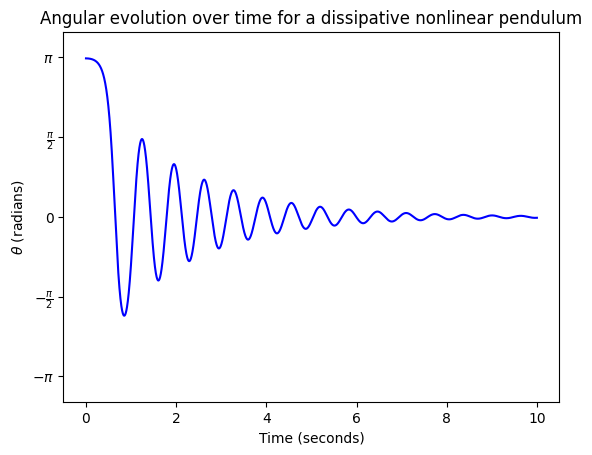

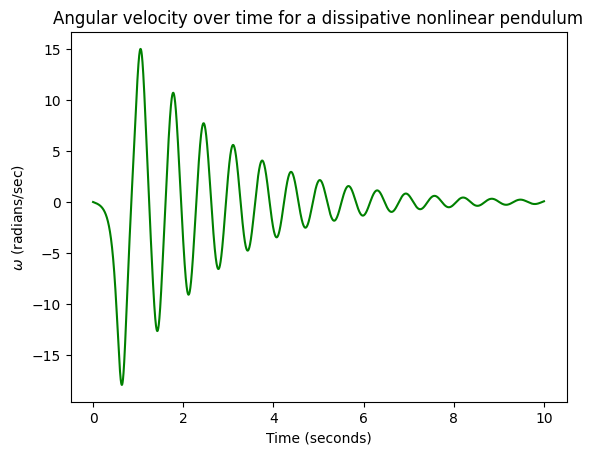

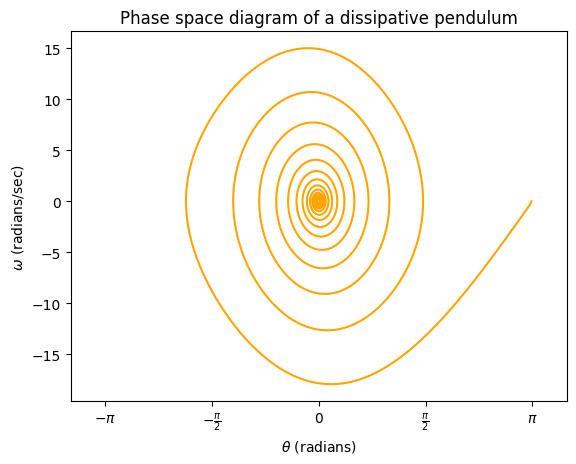

In [ ]:
g = 9.81
l = 0.1
k = 1 #Arbitrary choice

def f(r,t):
  theta = r[0]
  omega = r[1]
  ftheta = omega
  fomega = -k*omega -(g/l)*np.sin(theta)
  return np.array([ftheta,fomega] ,float)

a = 0.0
b = 10.0
N = 10000
h = (b-a)/N

tpoints = np.arange(a,b,h)
thpoints_d = []
ompoints_d = []
r = np.array([179*np.pi/180,0],float)

for t in tpoints:
  thpoints_d.append(r[0])
  ompoints_d.append(r[1])
  k1 = h*f(r,t)
  k2 = h*f(r + 0.5*k1, t + 0.5*h)
  k3 = h*f(r + 0.5*k2, t + 0.5*h)
  k4 = h*f(r + k3, t + h)
  r += (k1 + 2*k2 + 2*k3 + k4)/6

fig, ax = plt.subplots()
ax.set_xlabel('Time (seconds)')
ax.set_ylabel(r'$\theta$ (radians)')
ax.set_title('Angular evolution over time for a dissipative nonlinear pendulum')
ax.set_yticks([-np.pi, -np.pi/2,0, np.pi/2, np.pi])
ax.set_yticklabels([r'$-\pi$',r'$-\frac{\pi}{2}$','0',r'$\frac{\pi}{2}$',r'$\pi$'])
ax.set_ylim(-np.pi-0.5,np.pi+0.5)
ax.plot(tpoints,thpoints_d, color = 'blue')
plt.show()

fig1, ax1 = plt.subplots()
ax1.set_xlabel('Time (seconds)')
ax1.set_ylabel(r'$\omega$ (radians/sec)')
ax1.set_title('Angular velocity over time for a dissipative nonlinear pendulum')
ax1.plot(tpoints,ompoints_d, color = 'green')
plt.show()

fig2, ax2 = plt.subplots()
ax2.set_xlabel(r'$\theta$ (radians)')
ax2.set_ylabel(r'$\omega$ (radians/sec)')
ax2.set_title('Phase space diagram of a dissipative pendulum')
ax2.set_xticks([-np.pi, -np.pi/2,0, np.pi/2, np.pi])
ax2.set_xticklabels([r'$-\pi$',r'$-\frac{\pi}{2}$','0',r'$\frac{\pi}{2}$',r'$\pi$'])
ax2.set_xlim(-np.pi-0.5,np.pi+0.5)
ax2.plot(thpoints_d,ompoints_d, color ='orange')
plt.show()

As we can see from the plots above, both $\theta$ and $\omega$ eventually die out due to the energy dissipation in our system. We can also see that the system is no longer cyclical from the phase space diagram since there are no closed loops; the plot spirals into smaller and smaller values of $\theta$ and $\omega$ until it eventually dies out.